# __K-means Clustering__
---

## __1. K-means clustering 진행하기__

### __Module import__

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

### __데이터 준비__

In [7]:
x, y = make_blobs(n_samples=100, centers=8, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
print(points)

           x          y
0  -6.377849   3.650558
1  -8.387473   2.694264
2   8.681857  -4.536835
3   1.119293  -2.215728
4   7.643063 -10.023569
..       ...        ...
95  2.981200  11.835246
96  3.379439  11.481415
97 -2.438523   5.609295
98 -1.317674  -1.763754
99  2.822931   9.355920

[100 rows x 2 columns]


### __데이터 시각화__

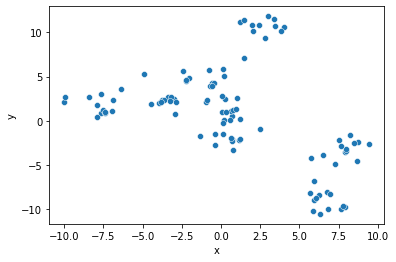

In [ ]:
sns.scatterplot(x="x", y="y", data=points, palette="Set2");

### __Initalize : Centorid__

In [ ]:
centroids = points.sample(6)
centroids

,x,y
31,0.639245,1.149632
81,7.968331,-3.231253
84,7.676196,-2.826204
21,-0.454541,4.224224
35,0.173071,0.090780
47,-0.668618,3.912677


1. 임의의 Centroid를 구하고, 샘플들과 임의의 Centroid들의 유클리드 거리를 구함.
2. K개의 각 거리별로 K개의 클러스터 군집 생성

In [ ]:
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,-6.377849,3.650558,5
1,-8.387473,2.694264,5
2,8.681857,-4.536835,1
3,1.119293,-2.215728,4
4,7.643063,-10.023569,1


이를 시각화 해보면 다음과 같음.

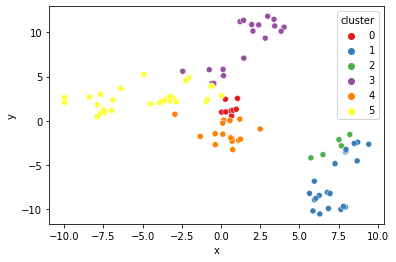

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

### __클러스터 별로 거리의 중심점(Centroid)을 평균값으로 계산__

In [ ]:
centroids_2 = result.groupby("cluster").mean()
centroids_2

,x,y
cluster,,
0,-7.531290,1.068227
1,3.823868,-3.130070
2,2.684072,10.788313
3,-8.214016,2.735136
4,-3.593437,2.405944
5,-0.851621,4.973741


In [ ]:
# Centorid_2를 사용(평균 값이 적용된 Centroid)
distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,-6.377849,3.650558,3
1,-8.387473,2.694264,3
2,8.681857,-4.536835,1
3,1.119293,-2.215728,1
4,7.643063,-10.023569,1


이를 시각화 했을 경우, 두 가지 경우가 발생   
1. Centroid가 잘 적용되어 클러스터가 잘 된 경우
2. Centroid가 제대로 적용되지 않아 클러스터가 잘못된 경우

>__2번의 경우 최초 데이터에서 샘플링 하여 임의의 Centroid를 설정하는 부분부터 다시 실행__

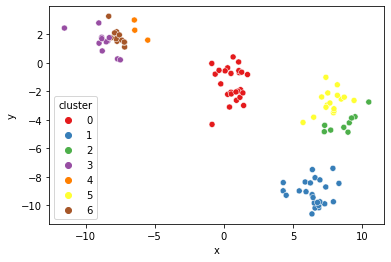

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");
plt.savefig('21720893_손명균_k_7.jpg')

### __최적 Centroid가 적용된 클러스터를 위한 반복 작업__

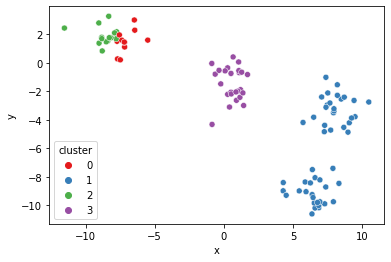

In [ ]:
centroids = points.sample(4)

distance = sp.spatial.distance.cdist(points, centroids, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)

centroids_2 = result.groupby("cluster").mean()

distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)

sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

<br /><br /><br />
## __2. Scikit-Learn을 통한 K-means clustering 진행하기__
---

### __Module import__

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### __데이터 준비__

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,0.276181,-2.217047
1,7.927368,-9.761527
2,8.491428,-2.549749
3,-11.537102,2.434883
4,4.292259,-8.992204


### __Scikit-Learn KMeans()__

In [ ]:
model = KMeans(n_clusters = 4, random_state = 0)
model.fit(points)

KMeans(n_clusters=4, random_state=0)

In [ ]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = model.labels_
result_by_sklearn.head()

,x,y,cluster
0,0.276181,-2.217047,2
1,7.927368,-9.761527,1
2,8.491428,-2.549749,3
3,-11.537102,2.434883,0
4,4.292259,-8.992204,1


### __데이터 시각화__

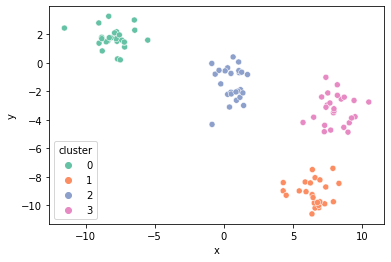

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");

### __최적의 클러스터 개수 찾기(Elbow)__

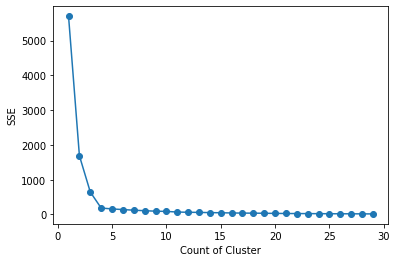

In [ ]:
def elbow(data, max_cluster):
  sse = []
  for i in range(1, max_cluster):
    km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    km.fit(data)
    sse.append(km.inertia_)
    pass
  plt.plot(range(1, max_cluster), sse, marker='o')
  plt.xlabel('Count of Cluster')
  plt.ylabel('SSE')
  plt.show()
  pass
elbow(points, 30)

### __Moons 데이터 K-Means Clustering__

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
x, y = make_moons(n_samples=100, random_state=0)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,-0.096023,0.995379
1,1.672301,-0.240278
2,0.991790,0.127877
3,0.050944,0.184892
4,1.032052,-0.499486


In [ ]:
model = KMeans(n_clusters = 6, init='k-means++')
model.fit(points)

KMeans(n_clusters=6)

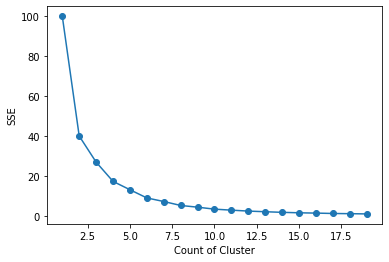

In [ ]:
elbow(points, 20)

In [ ]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = model.labels_
result_by_sklearn.head()

,x,y,cluster
0,-0.096023,0.995379,4
1,1.672301,-0.240278,2
2,0.991790,0.127877,3
3,0.050944,0.184892,5
4,1.032052,-0.499486,1


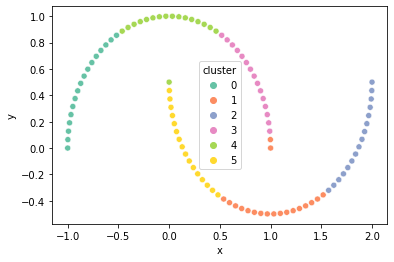

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");